 # Project: Data Science Blog Post - TMDb movie

### Table of Contents

- Introduction
- Business understanding
- Data understanding
- Prepar data and clean
- Answer Questions base on dataset
- Conclusions

# Introduction


This project is the Blog Post for the Data Scientist Nandegree Program from Udacity. I choose to work on a data set that contains TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb).The data Contains Information About The Budget, Revenue , the user rating, vote, genre and release year for each movie and more from 1960 to 2015 .

I would like to find intresting patterns in this dataset using paython packges pandas , numpy , seaborn , matplotlib in this analysis.


## Business Understanding

We are interested to answer the following four questions:
- Which genres are most popular ?
- Which genres are the most highest revenue?
- Is the movie rating influence the revenue?
- What other properties reflect the movies that have high revenues?

In [3]:
# import statements for all of the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Load data and print out a few lines. 

movies = pd.read_csv('tmdb-movies.csv')
movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

## Data understanding

In this section I got ageneral idea about the data

In [5]:
#take look at data  
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
movies.shape

(10866, 21)

In [7]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation From The Dataset**

- Number of rows are 10866
- Number of columns are 21
- The data type of each column
- genres columns have multi values should be spearate

## Prepare Data and clean

There are some necessary data preparation steps need to apply before digging deeper :

- Delete an unnecessary column.
- Delete duplicate values.
- Delete missing data because its objects.
- Delete all zero value in columne budget and revenue to not effects negatively on the analysis.
- split the data in column genre.

In [9]:
#drop unnecessary columns
movies.drop(['homepage','tagline','overview','production_companies','release_date','vote_count','keywords','imdb_id','budget_adj','revenue_adj','cast'] , axis=1 , inplace=True)
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015


In [10]:
movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

The genre have 23 missing values and becuase it is not a measure and it's not too much. So I'm going to drop the rows.

In [11]:
movies.dropna(inplace = True)

In [12]:
# test 
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

#### Now I'm going to drop all zero revenues and budgets to not effects negatively on the analysis

#### Budget and Revenue with "0" values will be converted to nulls then the nulls will be dropped using dropna

In [13]:
movies['budget'] = movies['budget'].replace(0, np.NAN)

In [14]:
movies['revenue'] = movies['revenue'].replace(0, np.NAN)

In [15]:
movies.dropna(inplace = True)

In [16]:
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

**lets see if there is any duplicated values**

In [17]:
movies.duplicated().sum()

1

**Then we will drop the duplicated values**

In [18]:

movies.drop_duplicates(inplace= True)

In [19]:
#test
movies.duplicated().sum()

0

In [20]:
#split the data in column genre
movies['genres'] = movies.genres.str.split("|",expand=True)
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,7.3,2015


#### Below the dataset after cleaning

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
id                3853 non-null int64
popularity        3853 non-null float64
budget            3853 non-null float64
revenue           3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
vote_average      3853 non-null float64
release_year      3853 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 331.1+ KB


## Answer Questions base on dataset

### Question 1- Which genres are most popular ?

In [22]:
#count number of movie over year release by grouping genres
number_movies= movies.groupby('genres').release_year.count()
number_movies

genres
Action             689
Adventure          314
Animation          103
Comedy             787
Crime              171
Documentary         32
Drama              889
Family              40
Fantasy            110
History             17
Horror             275
Music               29
Mystery             36
Romance             66
Science Fiction     98
TV Movie             1
Thriller           160
War                 20
Western             16
Name: release_year, dtype: int64

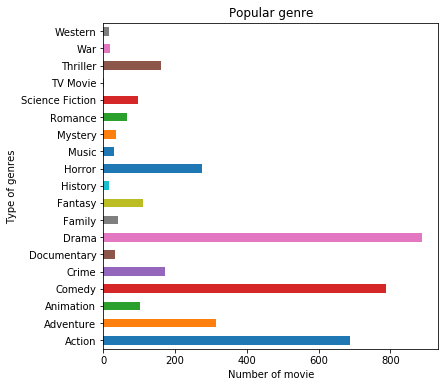

In [31]:
chart = number_movies.plot.barh(figsize = (6,6))
chart.set(title = 'Popular genre')
chart.set_ylabel('Type of genres')
chart.set_xlabel('Number of movie');

- From the plot we can see that most popular genre is Drama, followed by Comedy and Thriller
- Least popular Genre are Western and TV movies

### Question 2 - Which genres are the most highest revenue?

In [37]:
top_revenue_genres = movies.groupby('genres').revenue.max()
top_revenue_genres

genres
Action             2.781506e+09
Adventure          1.327818e+09
Animation          1.274219e+09
Comedy             8.537086e+08
Crime              1.106280e+09
Documentary        1.191145e+08
Drama              1.845034e+09
Family             1.156731e+09
Fantasy            8.908716e+08
History            4.492209e+08
Horror             4.706540e+08
Music              3.843356e+08
Mystery            6.728063e+08
Romance            5.423514e+08
Science Fiction    1.519558e+09
TV Movie           4.200000e+07
Thriller           7.582399e+08
War                6.505234e+08
Western            5.329505e+08
Name: revenue, dtype: float64

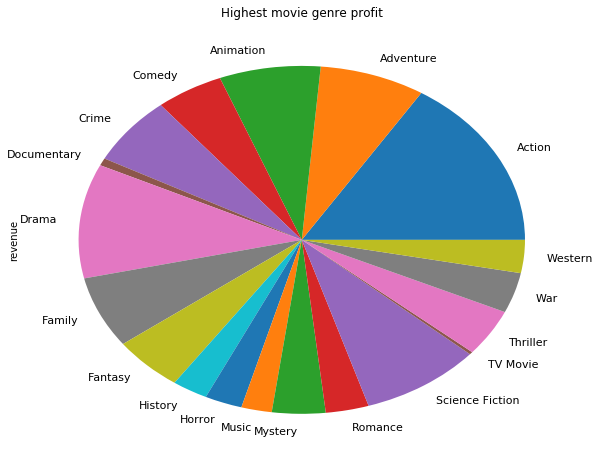

In [42]:
top_revenue = top_revenue_genres.plot.pie(fontsize = 11,figsize=(10, 8))
top_revenue.set(title = 'Highest movie genre profit');

Action genre movie is the highest revenue of the all genres , followed by Drama.

### Question 3 - Is the movie rating influence the revenue?

In [44]:
# Counting the revenue average 
revenue_ave = movies['revenue'].mean()
revenue_ave

107711709.95120685

Now I will divide the revenue into 2 section

- Movies below or equal the avarage revenue.
- Movies Above the avarage revenue.

In [46]:
higher_revenue = movies['revenue'] > revenue_ave
lower_revenue = movies['revenue'] <= revenue_ave

In [48]:
higher_revenue.value_counts()

False    2746
True     1107
Name: revenue, dtype: int64

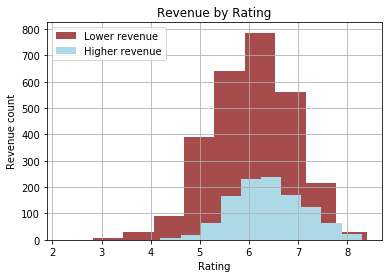

In [56]:
movies.vote_average[lower_revenue].hist(alpha=0.7,color='maroon' , label='Lower revenue')
movies.vote_average[higher_revenue].hist(color ='lightblue' , label='Higher revenue')
plt.title('Revenue by Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue count')
plt.legend();

As we can see above the Lower revenue has no relevance how good the raiting is. But it may effect on the bad rating. So on the histogram, we can see that all the lower_revenue and higher_revenue are equal on the good rating but on the other hand approximately only the lower revenue who gets the low voting

### Question 4 - What other properties reflect the movies that have high revenues?

let's check other columns can effect the revenue.

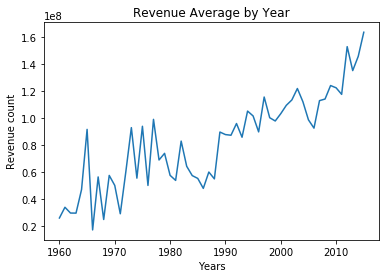

In [60]:
#check the average revenue for each year
movies.groupby('release_year')['revenue'].mean().plot(kind='line');
plt.title('Revenue Average by Year')
plt.ylabel('Revenue count')
plt.xlabel('Years');

The chart above shows that the revenue became higher in the latest years.

## Conclusions

In conclusions, I have looked at TMDB movie data. It is a rather large dataset however, analyzing part of it was interesting. 
After answering four questions we can said , the most popular genre is Drama, followed by Comedy and Thriller
and Least popular Genre are Western and TV movies.Action genre movie is the highest revenue of the all genres , followed by Drama. the movie rating is influence the revenue,the lower revenue gets the low voting. 
At last we can find that movies get higher revenues by years.